In [42]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [12]:
credit = pd.read_csv('data/dataset3.csv', header =1)

In [13]:
#Note: The 'ID' column is also in the analysis so make sure to plan your feature selection accordingly. 
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [14]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
#Data Details - Helps cleaning the data  fr 
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [16]:
credit.isna()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# From here on --->
#  Data cleaning
#  Data transformation
#  How to deal with missing values?
#  Data reduction
#  Data discretization
#  Text cleaning (if needed)
# From here on  use Pandas to write the changes to a new .csv :



In [87]:

import matplotlib.pyplot as plt

In [88]:
header = credit.dtypes.index

In [139]:
credit['EDUCATION'].value_counts(dropna=False)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [89]:
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


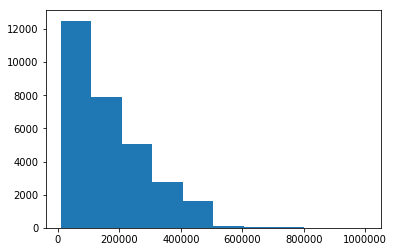

In [91]:
plt.hist(credit['LIMIT_BAL'])
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYoAAAD8CAYAAABpcuN4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4xLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvAOZPmwAAE8dJREFUeJzt3X+s3fV93/Hna3YhP9rEJjgRtdFsVCsbibaFWsRppqoKHRiIYv4AySgaXurJUke3tJ3UmuUPtKRIsFUlQ21IUHDrRCmG0WxYQMosQlVNahxMyQi/HN8Cg1touMhAs0ZN6/S9P87nkhNz78f2Odc+19fPh3R0vt/39/M938/nfo/vy98f59xUFZIkzecfTboDkqTFzaCQJHUZFJKkLoNCktRlUEiSugwKSVKXQSFJ6jIoJEldBoUkqWv5pDswqrPPPrvWrl076W5I0inlkUceeaWqVh3POqdsUKxdu5b9+/dPuhuSdEpJ8n+Pdx1PPUmSugwKSVKXQSFJ6jIoJEldBoUkqcugkCR1GRSSpC6DQpLUZVBIkrpO2U9mj2Ptjvsmst3nbrx8ItuVpHF4RCFJ6jIoJEldBoUkqeuoQZFkZ5KXkzw+VPuvSZ5O8liS/5FkxdCy65JMJTmQ5JKh+qZWm0qyY6i+Lsm+JAeT3JnkjIUcoCRpPMdyRPEHwKYjanuB91fVPwO+A1wHkOR8YAvwvrbO55IsS7IM+D3gUuB84OrWFuAm4OaqWg+8Cmwba0SSpAV11KCoqj8FDh1R+19VdbjNfgNY06Y3A7ur6gdV9SwwBVzYHlNV9UxV/R2wG9icJMBHgLvb+ruAK8YckyRpAS3ENYpfAr7WplcDLwwtm261+ervAl4bCp3ZuiRpkRgrKJJ8CjgMfGW2NEezGqE+3/a2J9mfZP/MzMzxdleSNIKRgyLJVuCjwMeravaX+zRw7lCzNcCLnforwIoky4+oz6mqbquqDVW1YdWq4/qTr5KkEY0UFEk2Ab8JfKyqvj+0aA+wJcmZSdYB64FvAg8D69sdTmcwuOC9pwXMQ8CVbf2twD2jDUWSdCIcy+2xdwB/Brw3yXSSbcDvAj8F7E3yrSSfB6iqJ4C7gCeBPwauraoftmsQvwI8ADwF3NXawiBwfj3JFINrFrcv6AglSWM56nc9VdXVc5Tn/WVeVTcAN8xRvx+4f476MwzuipIkLUJ+MluS1GVQSJK6DApJUpdBIUnqMigkSV0GhSSpy6CQJHUZFJKkLoNCktRlUEiSugwKSVKXQSFJ6jIoJEldBoUkqcugkCR1GRSSpC6DQpLUZVBIkroMCklSl0EhSeoyKCRJXQaFJKnLoJAkdRkUkqSuowZFkp1JXk7y+FDtrCR7kxxszytbPUluSTKV5LEkFwyts7W1P5hk61D9Z5N8u61zS5Is9CAlSaM7liOKPwA2HVHbATxYVeuBB9s8wKXA+vbYDtwKg2ABrgc+CFwIXD8bLq3N9qH1jtyWJGmCjhoUVfWnwKEjypuBXW16F3DFUP1LNfANYEWSc4BLgL1VdaiqXgX2ApvasndU1Z9VVQFfGnotSdIiMOo1ivdU1UsA7fndrb4aeGGo3XSr9erTc9QlSYvEQl/Mnuv6Qo1Qn/vFk+1J9ifZPzMzM2IXJUnHY9Sg+G47bUR7frnVp4Fzh9qtAV48Sn3NHPU5VdVtVbWhqjasWrVqxK5Lko7HqEGxB5i9c2krcM9Q/Zp299NG4PV2auoB4OIkK9tF7IuBB9qy7yXZ2O52umbotSRJi8DyozVIcgfwC8DZSaYZ3L10I3BXkm3A88BVrfn9wGXAFPB94BMAVXUoyWeAh1u7T1fV7AXyX2ZwZ9Vbga+1hyRpkThqUFTV1fMsumiOtgVcO8/r7AR2zlHfD7z/aP2QJE2Gn8yWJHUZFJKkLoNCktRlUEiSugwKSVKXQSFJ6jIoJEldBoUkqcugkCR1GRSSpC6DQpLUZVBIkroMCklSl0EhSeoyKCRJXQaFJKnLoJAkdRkUkqQug0KS1GVQSJK6DApJUpdBIUnqMigkSV0GhSSpy6CQJHWNFRRJfi3JE0keT3JHkrckWZdkX5KDSe5MckZre2abn2rL1w69znWtfiDJJeMNSZK0kEYOiiSrgf8AbKiq9wPLgC3ATcDNVbUeeBXY1lbZBrxaVT8D3NzakeT8tt77gE3A55IsG7VfkqSFNe6pp+XAW5MsB94GvAR8BLi7Ld8FXNGmN7d52vKLkqTVd1fVD6rqWWAKuHDMfkmSFsjIQVFVfwn8NvA8g4B4HXgEeK2qDrdm08DqNr0aeKGte7i1f9dwfY51fkyS7Un2J9k/MzMzatclScdhnFNPKxkcDawDfhp4O3DpHE1rdpV5ls1Xf3Ox6raq2lBVG1atWnX8nZYkHbflY6z7i8CzVTUDkOSrwM8BK5Isb0cNa4AXW/tp4Fxgup2qeidwaKg+a3idJWXtjvsmtu3nbrx8YtuWdGob5xrF88DGJG9r1xouAp4EHgKubG22Ave06T1tnrb861VVrb6l3RW1DlgPfHOMfkmSFtDIRxRVtS/J3cCfA4eBR4HbgPuA3Ul+q9Vub6vcDnw5yRSDI4kt7XWeSHIXg5A5DFxbVT8ctV+SpIU1zqknqup64Pojys8wx11LVfW3wFXzvM4NwA3j9EWSdGL4yWxJUpdBIUnqMigkSV0GhSSpy6CQJHUZFJKkLoNCktRlUEiSugwKSVKXQSFJ6jIoJEldBoUkqcugkCR1GRSSpC6DQpLUZVBIkroMCklSl0EhSeoyKCRJXQaFJKnLoJAkdRkUkqQug0KS1GVQSJK6xgqKJCuS3J3k6SRPJflQkrOS7E1ysD2vbG2T5JYkU0keS3LB0Otsbe0PJtk67qAkSQtn3COK/wb8cVX9E+CfA08BO4AHq2o98GCbB7gUWN8e24FbAZKcBVwPfBC4ELh+NlwkSZM3clAkeQfw88DtAFX1d1X1GrAZ2NWa7QKuaNObgS/VwDeAFUnOAS4B9lbVoap6FdgLbBq1X5KkhTXOEcV5wAzw+0keTfLFJG8H3lNVLwG053e39quBF4bWn261+epvkmR7kv1J9s/MzIzRdUnSsRonKJYDFwC3VtUHgL/hR6eZ5pI5atWpv7lYdVtVbaiqDatWrTre/kqSRjBOUEwD01W1r83fzSA4vttOKdGeXx5qf+7Q+muAFzt1SdIiMHJQVNVfAS8keW8rXQQ8CewBZu9c2grc06b3ANe0u582Aq+3U1MPABcnWdkuYl/capKkRWD5mOv/e+ArSc4AngE+wSB87kqyDXgeuKq1vR+4DJgCvt/aUlWHknwGeLi1+3RVHRqzX5KkBTJWUFTVt4ANcyy6aI62BVw7z+vsBHaO0xdJ0onhJ7MlSV0GhSSpy6CQJHUZFJKkLoNCktRlUEiSugwKSVKXQSFJ6jIoJEldBoUkqWvc73rSKWLtjvsmst3nbrx8ItuVtHA8opAkdRkUkqQug0KS1GVQSJK6DApJUpdBIUnqMigkSV0GhSSpy6CQJHUZFJKkLoNCktRlUEiSugwKSVLX2EGRZFmSR5Pc2+bXJdmX5GCSO5Oc0epntvmptnzt0Gtc1+oHklwybp8kSQtnIY4oPgk8NTR/E3BzVa0HXgW2tfo24NWq+hng5taOJOcDW4D3AZuAzyVZtgD9kiQtgLGCIska4HLgi20+wEeAu1uTXcAVbXpzm6ctv6i13wzsrqofVNWzwBRw4Tj9kiQtnHGPKD4L/AbwD23+XcBrVXW4zU8Dq9v0auAFgLb89db+jfoc60iSJmzkoEjyUeDlqnpkuDxH0zrKst46R25ze5L9SfbPzMwcV38lSaMZ54jiw8DHkjwH7GZwyumzwIoks39idQ3wYpueBs4FaMvfCRwars+xzo+pqtuqakNVbVi1atUYXZckHauRg6KqrquqNVW1lsHF6K9X1ceBh4ArW7OtwD1tek+bpy3/elVVq29pd0WtA9YD3xy1X5KkhbX86E2O228Cu5P8FvAocHur3w58OckUgyOJLQBV9USSu4AngcPAtVX1wxPQL0nSCBYkKKrqT4A/adPPMMddS1X1t8BV86x/A3DDQvRFkrSw/GS2JKnLoJAkdRkUkqQug0KS1GVQSJK6DApJUpdBIUnqMigkSV0GhSSpy6CQJHUZFJKkLoNCktRlUEiSugwKSVKXQSFJ6joRf7hIesPaHfdNbNvP3Xj5xLYtLSUeUUiSugwKSVKXQSFJ6jIoJEldBoUkqcugkCR1GRSSpC6DQpLUNXJQJDk3yUNJnkryRJJPtvpZSfYmOdieV7Z6ktySZCrJY0kuGHqtra39wSRbxx+WJGmhjHNEcRj4j1X1T4GNwLVJzgd2AA9W1XrgwTYPcCmwvj22A7fCIFiA64EPAhcC18+GiyRp8kYOiqp6qar+vE1/D3gKWA1sBna1ZruAK9r0ZuBLNfANYEWSc4BLgL1VdaiqXgX2AptG7ZckaWEtyDWKJGuBDwD7gPdU1UswCBPg3a3ZauCFodWmW22+uiRpERg7KJL8JPBHwK9W1V/3ms5Rq059rm1tT7I/yf6ZmZnj76wk6biNFRRJfoJBSHylqr7ayt9tp5Rozy+3+jRw7tDqa4AXO/U3qarbqmpDVW1YtWrVOF2XJB2jce56CnA78FRV/c7Qoj3A7J1LW4F7hurXtLufNgKvt1NTDwAXJ1nZLmJf3GqSpEVgnL9H8WHgXwPfTvKtVvtPwI3AXUm2Ac8DV7Vl9wOXAVPA94FPAFTVoSSfAR5u7T5dVYfG6JckaQGNHBRV9b+Z+/oCwEVztC/g2nleayewc9S+SJJOHD+ZLUnq8k+hasma1J9h9U+waqnxiEKS1GVQSJK6DApJUpdBIUnqMigkSV0GhSSpy6CQJHUZFJKkLoNCktRlUEiSugwKSVKXQSFJ6jIoJEldBoUkqcugkCR1GRSSpC6DQpLUZVBIkroMCklSl0EhSeoyKCRJXQaFJKlr0QRFkk1JDiSZSrJj0v2RJA0siqBIsgz4PeBS4Hzg6iTnT7ZXkiSA5ZPuQHMhMFVVzwAk2Q1sBp6caK+kEazdcd/Etv3cjZdPbNtauhZLUKwGXhianwY+OKG+SKesSYbUJBiMJ8diCYrMUas3NUq2A9vb7P9LcuA4tnE28MoIfTuVnY5jhtNz3KfjmMlNp+W4xx3zPz7eFRZLUEwD5w7NrwFePLJRVd0G3DbKBpLsr6oNo3Xv1HQ6jhlOz3GfjmOG03PckxjzoriYDTwMrE+yLskZwBZgz4T7JElikRxRVNXhJL8CPAAsA3ZW1RMT7pYkiUUSFABVdT9w/wncxEinrE5xp+OY4fQc9+k4Zjg9x33Sx5yqN10zliTpDYvlGoUkaZFa8kFxKn41SJJzkzyU5KkkTyT5ZKuflWRvkoPteWWrJ8ktbYyPJblg6LW2tvYHk2wdqv9skm+3dW5Jkt42TvL4lyV5NMm9bX5dkn2tT3e2Gx5Icmabn2rL1w69xnWtfiDJJUP1Od8P823jJI13RZK7kzzd9vmHTod9neTX2vv78SR3JHnLUtvXSXYmeTnJ40O1ie3b3ja6qmrJPhhcGP8L4DzgDOD/AOdPul/H0O9zgAva9E8B32Hw1Sb/BdjR6juAm9r0ZcDXGHweZSOwr9XPAp5pzyvb9Mq27JvAh9o6XwMubfU5t3GSx//rwB8C97b5u4AtbfrzwC+36X8HfL5NbwHubNPnt319JrCuvQeW9d4P823jJI13F/Bv2/QZwIqlvq8ZfMj2WeCtQz//f7PU9jXw88AFwONDtYnt2/m2cdRxnKw3xiQe7Qf4wND8dcB1k+7XCOO4B/hXwAHgnFY7BzjQpr8AXD3U/kBbfjXwhaH6F1rtHODpofob7ebbxkkc6xrgQeAjwL3tDf0KsPzIfcrgLrkPtenlrV2O3M+z7eZ7P/S2cRLG+w4GvzBzRH1J72t+9G0MZ7V9dy9wyVLc18BafjwoJrZv59vG0caw1E89zfXVIKsn1JeRtEPsDwD7gPdU1UsA7fndrdl84+zVp+eo09nGyfJZ4DeAf2jz7wJeq6rDbX64r2+Mry1/vbU/3p9Hbxsn2nnADPD7GZxu+2KSt7PE93VV/SXw28DzwEsM9t0jLO19PWuS+3ak34lLPSiO6atBFqskPwn8EfCrVfXXvaZz1GqE+kQl+SjwclU9Mlyeo2kdZdmp9PNYzuDUxK1V9QHgbxicKpjPqTS2ebVz5psZnC76aeDtDL49+khLaV8fzckYy0jjX+pBcUxfDbIYJfkJBiHxlar6ait/N8k5bfk5wMutPt84e/U1c9R72zgZPgx8LMlzwG4Gp58+C6xIMvuZn+G+vjG+tvydwCGO/+fxSmcbJ9o0MF1V+9r83QyCY6nv618Enq2qmar6e+CrwM+xtPf1rEnu25F+Jy71oDglvxqk3blwO/BUVf3O0KI9wOwdD1sZXLuYrV/T7mjYCLzeDjcfAC5OsrL9D+5iBudjXwK+l2Rj29Y1R7zWXNs44arquqpaU1VrGeyrr1fVx4GHgCvn6NNwX69s7avVt7Q7ZdYB6xlc9Jvz/dDWmW8bJ1RV/RXwQpL3ttJFDL5ef0nvawannDYmeVvr1+y4l+y+HjLJfTvfNvpO1sWrST0YXOX/DoM7ID416f4cY5//JYPDwceAb7XHZQzOrz4IHGzPZ7X2YfCHn/4C+DawYei1fgmYao9PDNU3AI+3dX6XH334cs5tTOBn8Av86K6n8xj8458C/jtwZqu/pc1PteXnDa3/qTa2A7Q7QXrvh/m2cZLG+i+A/W1//08Gd7Ys+X0N/Gfg6da3LzO4c2lJ7WvgDgbXYP6ewf/mt01y3/a20Xv4yWxJUtdSP/UkSRqTQSFJ6jIoJEldBoUkqcugkCR1GRSSpC6DQpLUZVBIkrr+P3uIVTpoaCTkAAAAAElFTkSuQmCC

(array([  2.32830000e+04,   6.51100000e+03,   2.00000000e+02,
          6.00000000e+00]),
 array([   10000.,   257500.,   505000.,   752500.,  1000000.]),
 <a list of 4 Patch objects>)

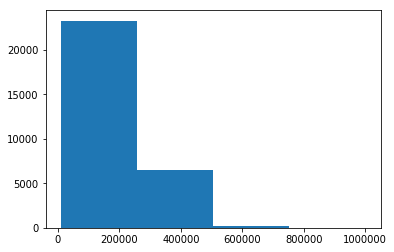

In [92]:
plt.hist(credit['LIMIT_BAL'], bins=4)

(array([  5.12700000e+03,   8.26100000e+03,   6.51400000e+03,
          4.81200000e+03,   2.60600000e+03,   1.83600000e+03,
          6.28000000e+02,   1.71000000e+02,   4.00000000e+01,
          5.00000000e+00]),
 array([ 21. ,  26.8,  32.6,  38.4,  44.2,  50. ,  55.8,  61.6,  67.4,
         73.2,  79. ]),
 <a list of 10 Patch objects>)

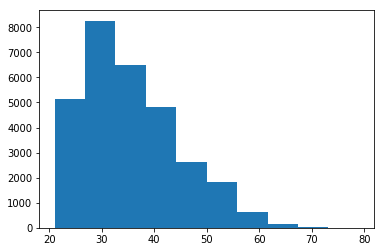

In [95]:
plt.hist(credit['AGE'])

(array([ 11888.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  18112.]),
 array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
 <a list of 10 Patch objects>)

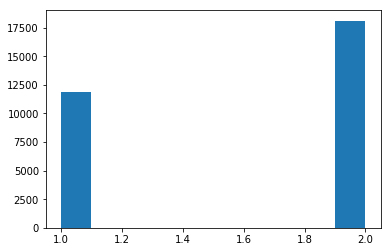

In [96]:
plt.hist(credit['SEX'])

(array([  2.03780000e+04,   7.81800000e+03,   1.72500000e+03,
          7.80000000e+01,   1.00000000e+00]),
 array([   10000.,   208000.,   406000.,   604000.,   802000.,  1000000.]),
 <a list of 5 Patch objects>)

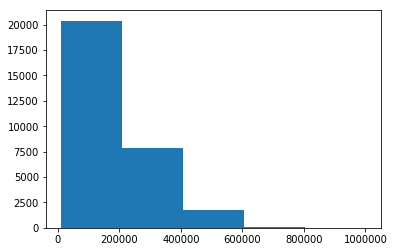

In [99]:
plt.hist(credit['LIMIT_BAL'], bins=5)

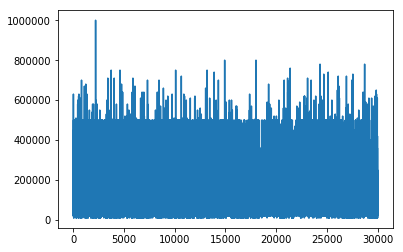

In [104]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

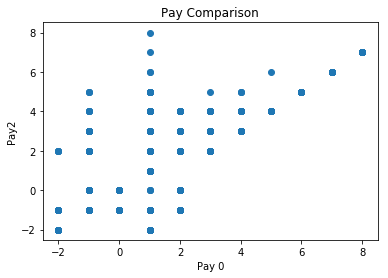

In [128]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.title("Pay Comparison")
plt.xlabel("Pay 0")
plt.ylabel("Pay2");


plt.scatter(x,y)

plt.show()

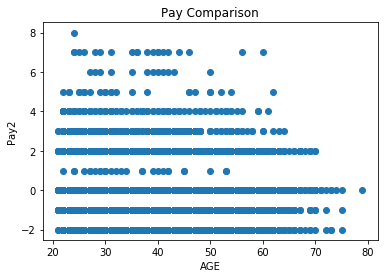

In [130]:
x = credit['AGE']
y = credit['PAY_2']
plt.title("Pay Comparison")
plt.xlabel("AGE")
plt.ylabel("Pay2");


plt.scatter(x,y)

plt.show()

In [131]:
credit.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [134]:
credit['SEX'].value_counts(dropna=False)

2    18112
1    11888
Name: SEX, dtype: int64

In [17]:
credit['EDUCATION'].value_counts(dropna=True)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'SEX v/s COUNT 1:Gender (1=male, 2=female) ')

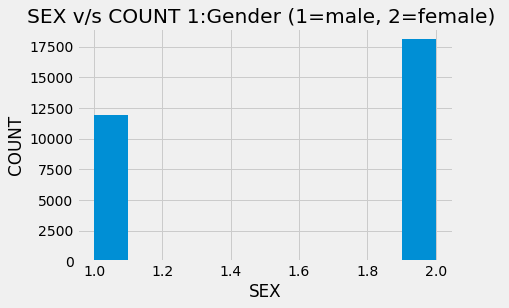

In [18]:
plt.style.use('fivethirtyeight')
credit['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT 1:Gender (1=male, 2=female) ')

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

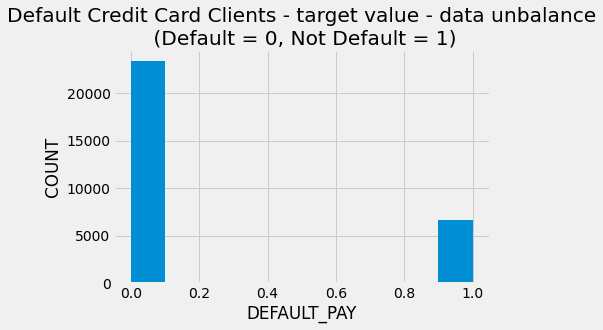

In [19]:
plt.style.use('fivethirtyeight')
credit['default payment next month'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

Text(0.5, 1.0, 'EDUCATION v/s COUNT   ')

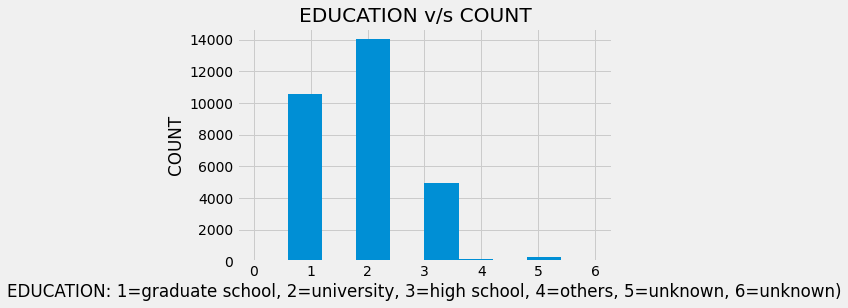

In [21]:
plt.style.use('fivethirtyeight')
credit['EDUCATION'].hist()
plt.xlabel('EDUCATION: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT   ')

Text(0.5, 1.0, 'MARRIAGE v/s COUNT (1=married, 2=single, 3=others)')

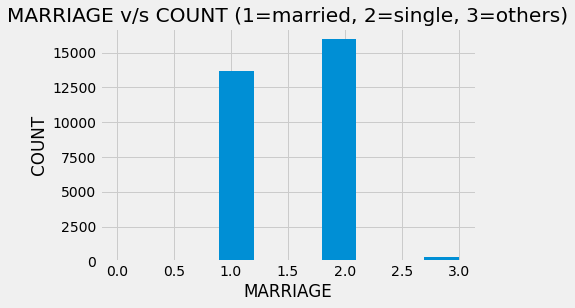

In [22]:


plt.style.use('fivethirtyeight')
credit['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT (1=married, 2=single, 3=others)')



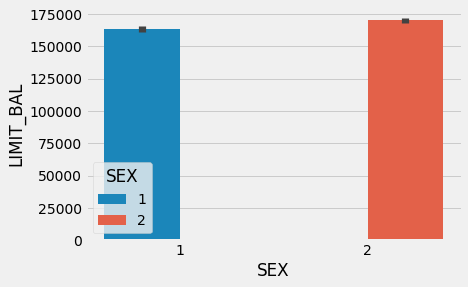

In [23]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=credit
            ,hue='SEX')



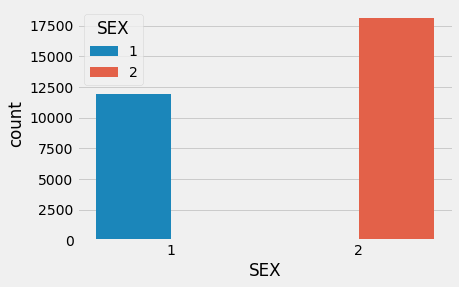

In [24]:
sns.countplot(x='SEX',data=credit,hue = 'SEX')

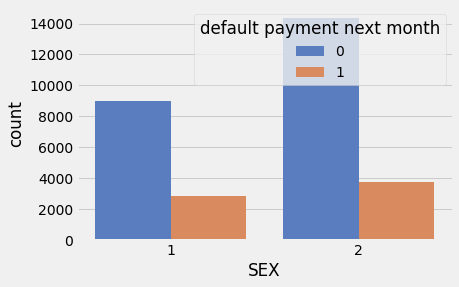

In [25]:
# Checking the number of counts of defaulters and non defaulters sexwise


sns.countplot(x='SEX', data=credit,hue="default payment next month", palette="muted")

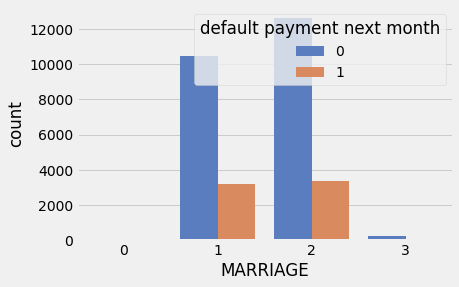

In [30]:
sns.countplot(x="MARRIAGE", data=credit,hue="default payment next month", palette="muted")

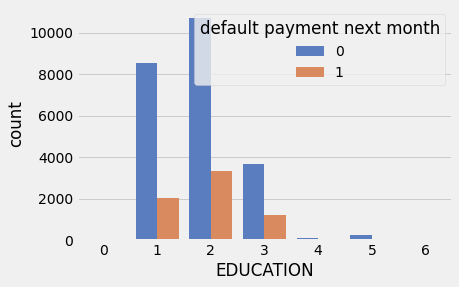

In [33]:
sns.countplot(x="EDUCATION", data=credit,hue="default payment next month", palette="muted")

In [36]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

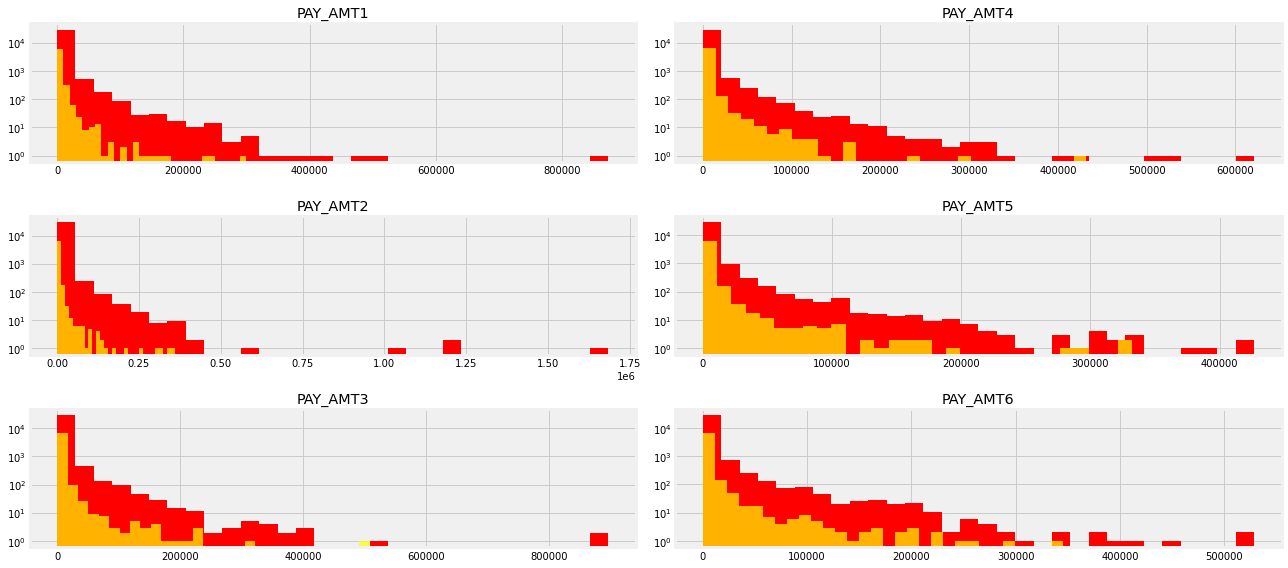

In [52]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(credit[pay_amt_columns[i]][(credit['default payment next month']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()


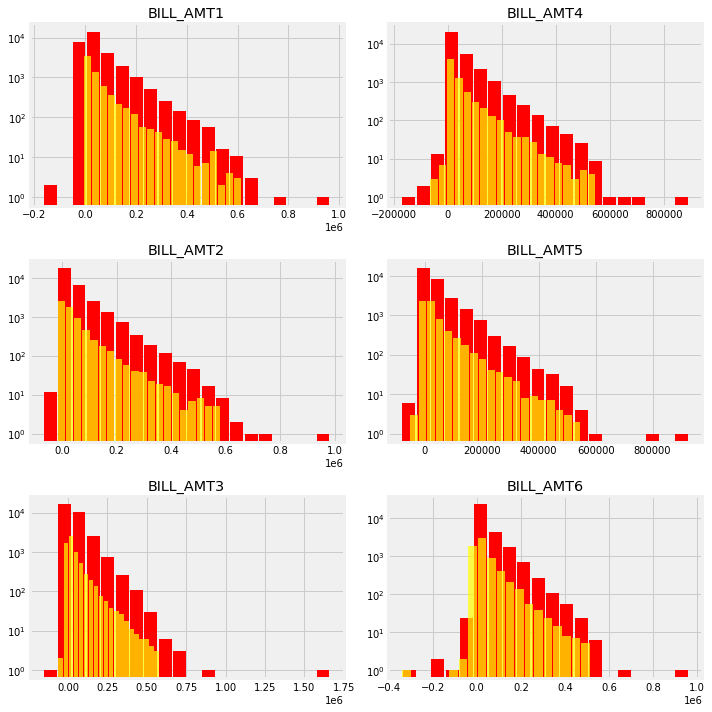

In [54]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(credit[bill_atm_columns[i]][(credit['default payment next month']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

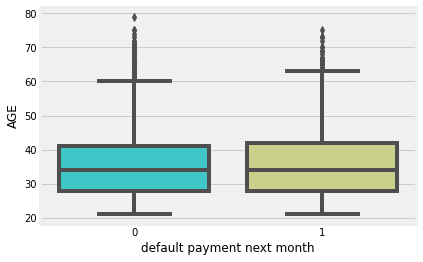

In [57]:
sns.boxplot(x='default payment next month',y='AGE',data=credit,palette='rainbow')

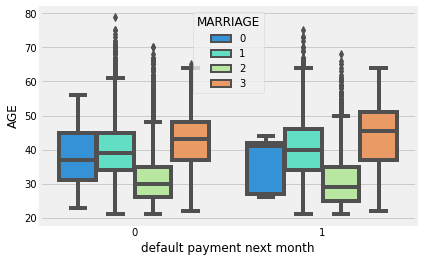

In [60]:
sns.boxplot(x='default payment next month',hue='MARRIAGE', y='AGE',data=credit,palette="rainbow")

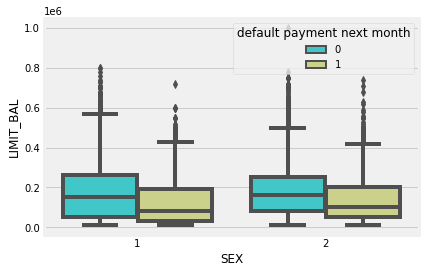

In [63]:
sns.boxplot(x='SEX',hue='default payment next month', y='LIMIT_BAL',data=credit,palette="rainbow")


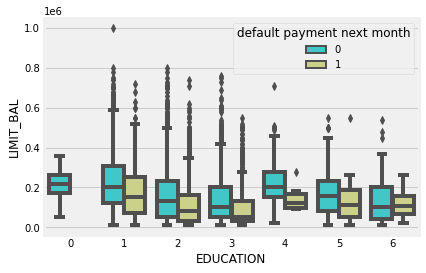

In [65]:
sns.boxplot(x='EDUCATION',hue='default payment next month', y='LIMIT_BAL',data=credit,palette="rainbow")

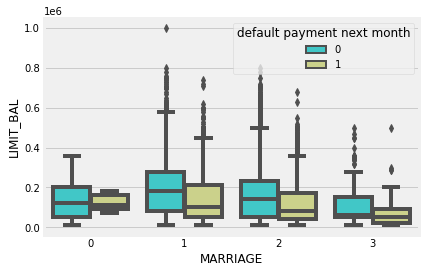

In [68]:
sns.boxplot(x='MARRIAGE',hue='default payment next month', y='LIMIT_BAL',data=credit,palette="rainbow")

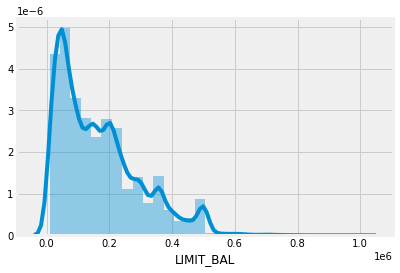

In [70]:
sns.distplot(credit['LIMIT_BAL'],kde=True,bins=30)


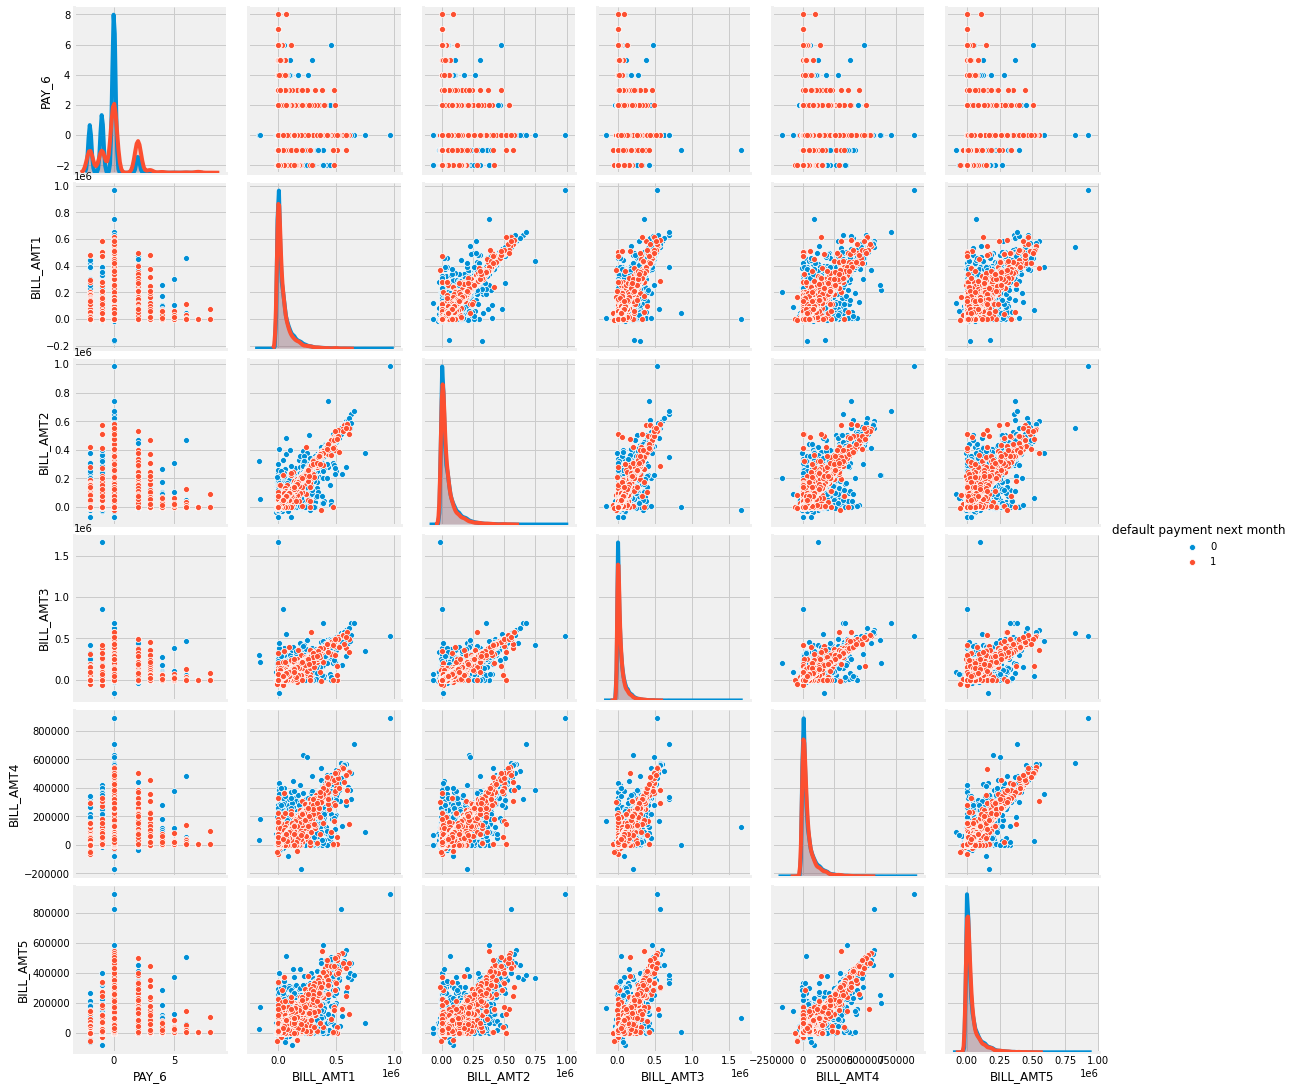

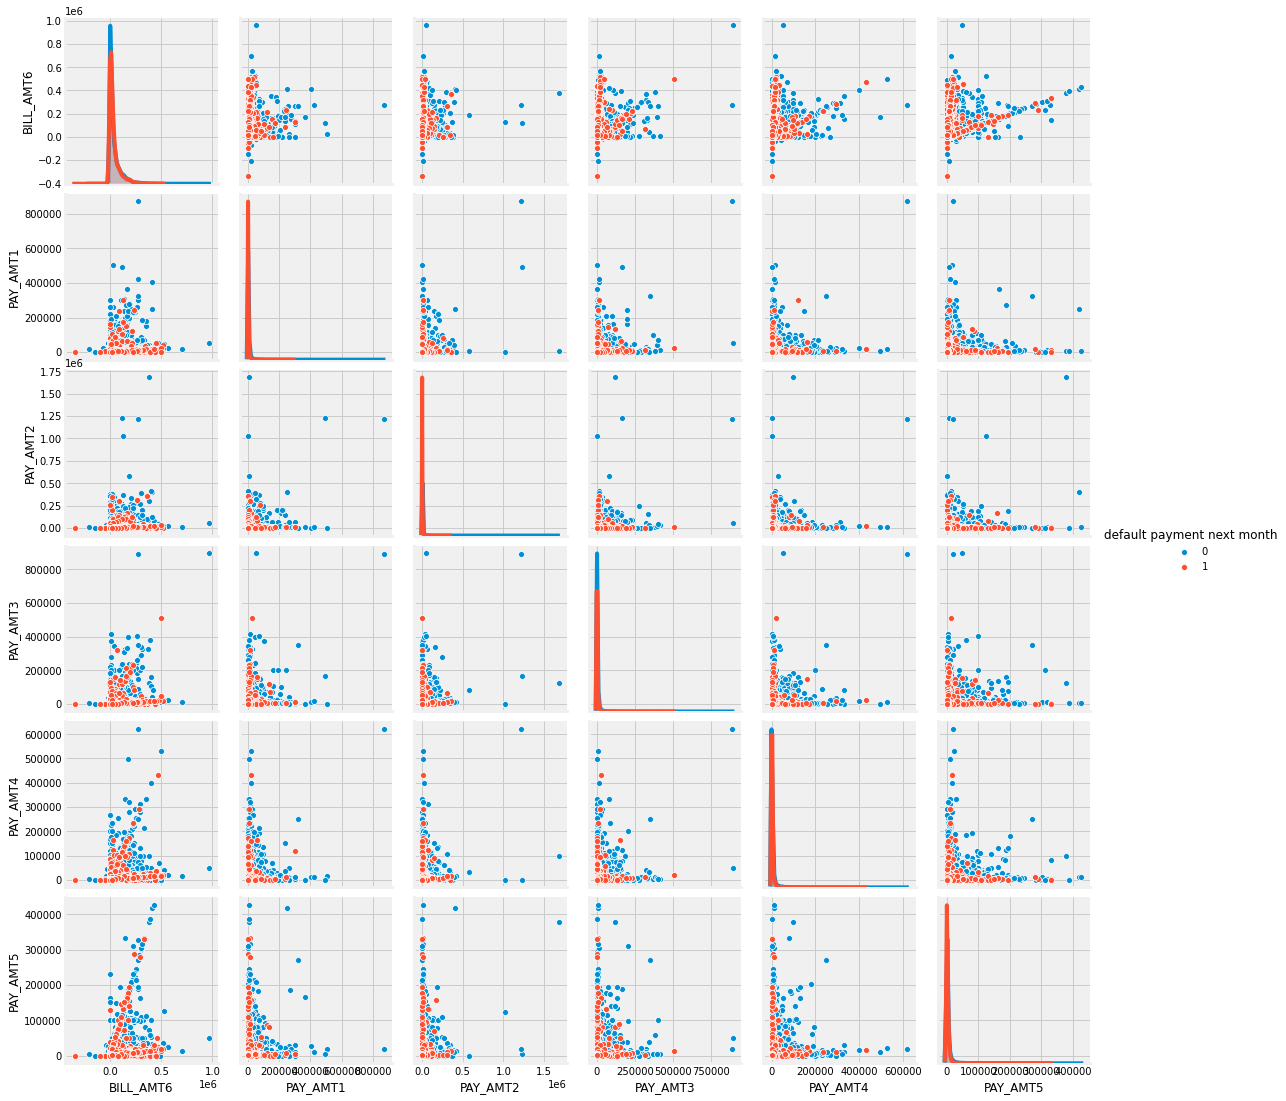

In [73]:
# plot columns with similar names to check the correlation

sns.pairplot(credit, vars=credit.columns[11:17], kind='scatter',hue= 'default payment next month')
sns.pairplot(credit, vars=credit.columns[17:23],hue = 'default payment next month')

In [79]:
correlation = credit.corr()

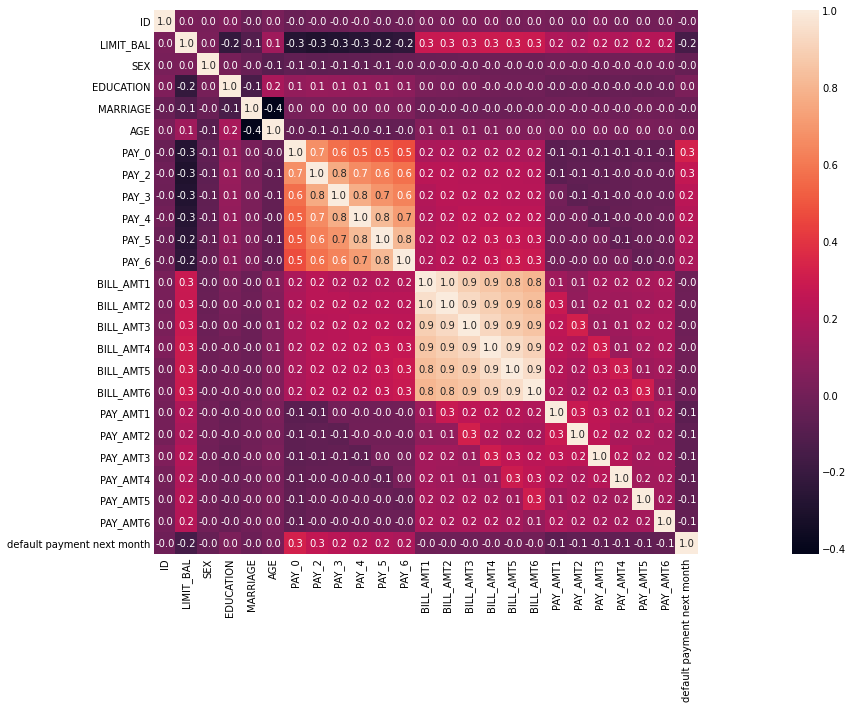

In [81]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )



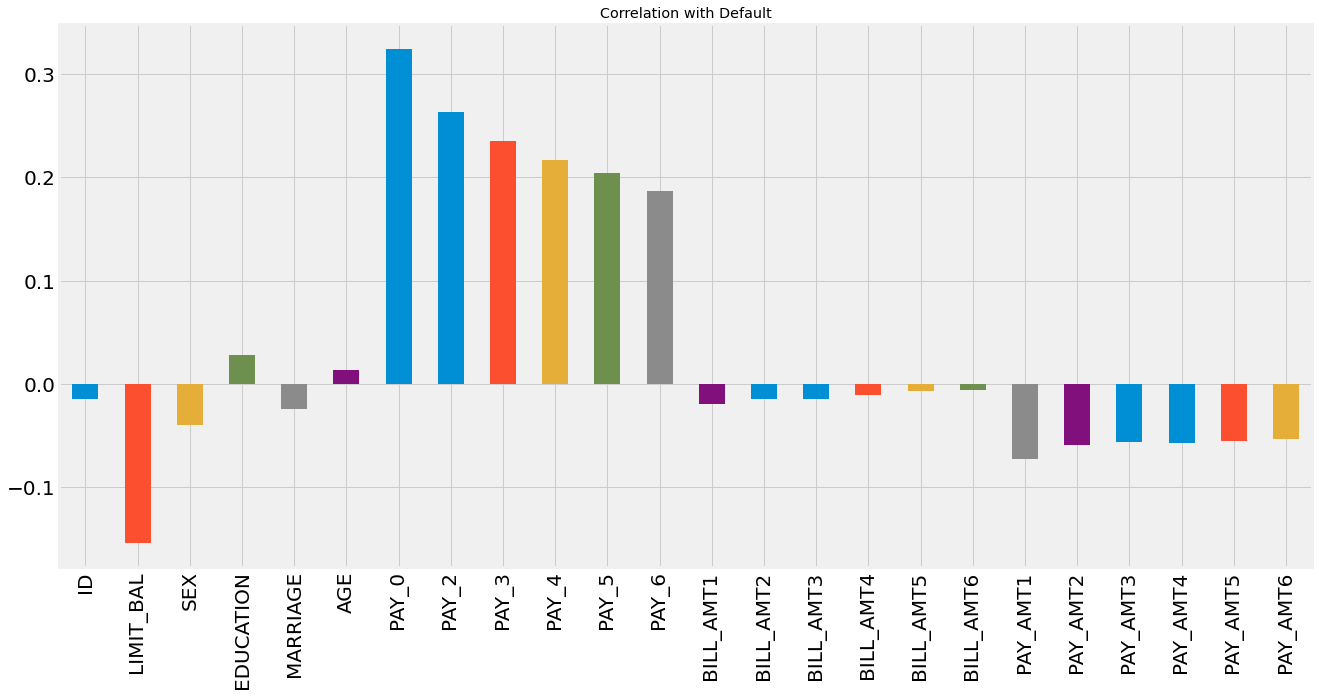

In [84]:
X = credit.drop(['default payment next month'],axis=1)
X.corrwith(credit['default payment next month']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

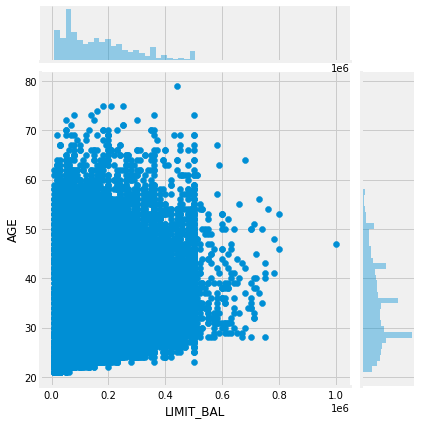

In [86]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=credit,kind="scatter")

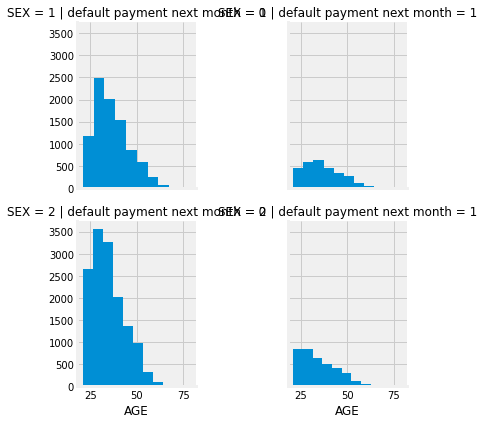

In [96]:
g = sns.FacetGrid(credit, col = 'default payment next month'  , row = 'SEX')
g.map(plt.hist, 'AGE')

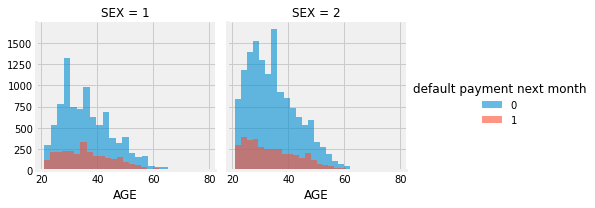

In [92]:
g = sns.FacetGrid(credit, col='SEX', hue='default payment next month')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()



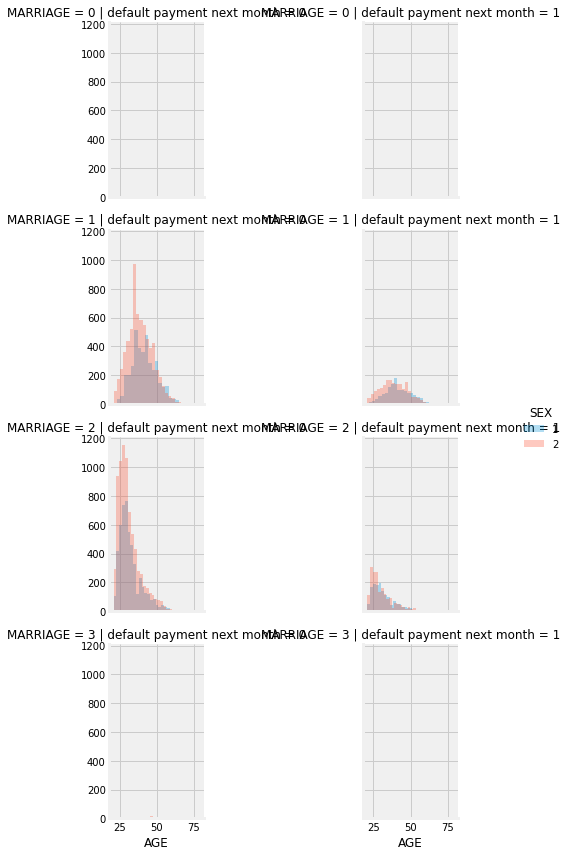

In [94]:
g = sns.FacetGrid(credit, col='default payment next month', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()